In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Прочитайте csv файл (використовуйте функцію read_csv)
Виведіть перші п'ять рядків (використовується функція head)
Виведіть розміри датасету (використовуйте атрибут shape)

**Відповідь: Про скільки книг зберігає дані датасет? Про 550**

In [2]:
book_data = pd.read_csv('bestsellers with categories.csv')

In [3]:
book_data.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [4]:
book_data.shape

(550, 7)

Перейменування колонок

In [5]:
book_data.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)
**Відповідь: Чи є в якихось змінних пропуски? Ні**

In [6]:
book_data.isna().sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)
**Відповідь: Які є унікальні жанри? 'Non Fiction', 'Fiction'**

In [7]:
pd.unique(book_data['genre'])

array(['Non Fiction', 'Fiction'], dtype=object)

Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')

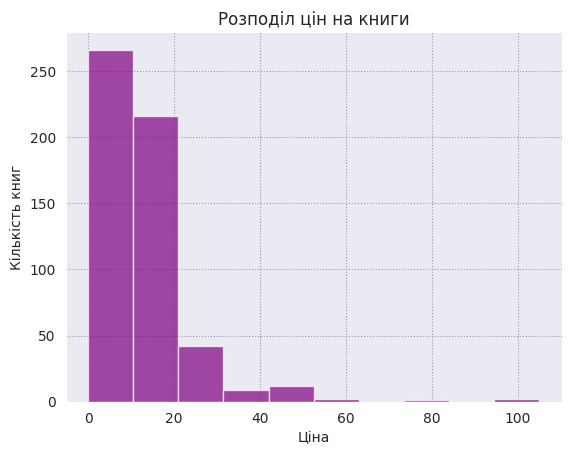

In [80]:
book_data.price.plot(kind='hist', color='purple', alpha=0.7)
plt.title('Розподіл цін на книги')
plt.xlabel('Ціна')
plt.ylabel('Кількість книг')
plt.show()

Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)

Відповідь: Максимальна ціна? 105

Відповідь: Мінімальна ціна? 0

Відповідь: Середня ціна? 13.1


Відповідь: Медіанна ціна? 11.0

In [8]:
print(book_data['price'].max())
print(book_data['price'].min())
print(book_data['price'].mean())
print(book_data['price'].median())

105
0
13.1
11.0


Відповідь: Який рейтинг у датасеті найвищий? 4.9

In [9]:
book_data['user_rating'].max()

4.9

Відповідь: Скільки книг мають такий рейтинг? Відповідь: 52

In [10]:
books_with_hight_rate = book_data[book_data['user_rating'] == 4.9].count()
print(books_with_hight_rate)

name           52
author         52
user_rating    52
reviews        52
price          52
year           52
genre          52
dtype: int64


Відповідь: Яка книга має найбільше відгуків? Where the Crawdads Sing, Delia Owens

In [90]:
book_with_max_reviews = book_data[book_data.reviews == book_data.reviews.max()]
print(book_with_max_reviews)

                        name       author  user_rating  reviews  price  year  \
534  Where the Crawdads Sing  Delia Owens          4.8    87841     15  2019   

       genre  
534  Fiction  


Відповідь: З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? Publication Manual of the American Psychologic...,  American Psychological Association

In [91]:
most_expensive_in_2015 = top_50_2015[top_50_2015.price == top_50_2015.price.max()]
print(most_expensive_in_2015)

                                                  name  \
277  Publication Manual of the American Psychologic...   

                                 author  user_rating  reviews  price  year  \
277  American Psychological Association          4.5     8580     46  2015   

           genre  
277  Non Fiction  


Відповідь: Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? 20

In [16]:
fiction_books_2010 = book_data[(book_data.year == 2010) & (book_data.genre == 'Fiction')]
print(len(fiction_books_2010))

20


Відповідь: Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? 0, 1

In [17]:
top_books_2010 = book_data[(book_data.user_rating == 4.9) & (book_data.year == 2010)]
top_books_2011 = book_data[(book_data.user_rating == 4.9) & (book_data.year == 2011)]
print(len(top_books_2010))
print(len(top_books_2011))

0
1


І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).Відповідь: Яка книга остання у відсортованому списку? Old School (Diary of a Wimpy Kid #10),	Jeff Kinney

In [92]:
top_50_2015[top_50_2015.price < 8].sort_values(by='price')

,name,author,user_rating,reviews,price,year,genre
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
123,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2015,Fiction
210,Laugh-Out-Loud Jokes for Kids,Rob Elliott,4.6,6990,4,2015,Non Fiction
54,Creative Haven Creative Cats Coloring Book (Ad...,Marjorie Sarnat,4.8,4022,4,2015,Non Fiction
206,Knock-Knock Jokes for Kids,Rob Elliott,4.5,3673,4,2015,Non Fiction
111,First 100 Words,Roger Priddy,4.7,17323,4,2015,Non Fiction
478,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2015,Fiction
224,Love You Forever,Robert Munsch,4.8,18613,5,2015,Fiction
63,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922,5,2015,Fiction
55,Creative Haven Owls Coloring Book (Adult Color...,Marjorie Sarnat,4.8,3871,5,2015,Non Fiction


Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів (використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min). Не беріть усі стовпці, виберіть тільки потрібні вам

In [47]:
book_data_grouped = book_data.groupby('genre').agg({'price': ['max', 'min']})

Відповідь: Максимальна ціна для жанру Fiction: 82

Відповідь: Мінімальна ціна для жанру Fiction: 0

Відповідь: Максимальна ціна для жанру Non Fiction: 105

Відповідь: Мінімальна ціна для жанру Non Fiction: 0

In [48]:
book_data_grouped

price    
              max min
genre                
Fiction        82   0
Non Fiction   105   0

Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count). Не беріть усі стовпці, виберете тільки потрібні

Відповідь: Якої розмірності вийшла таблиця? 248, 1

Відповідь: Який автор має найбільше книг? Jeff Kinney

Відповідь: Скільки книг цього автора? 12

In [49]:
authors_books = book_data.groupby('author').agg('name').count().to_frame()
authors_books.rename(columns={'name':'books_count'}, inplace=True)

In [50]:
authors_books.shape

(248, 1)

In [52]:
authors_books[authors_books['books_count'] == authors_books['books_count'].max()]

,books_count
author,
Jeff Kinney,12


Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean). Не беріть усі стовпці, виберете тільки потрібні

Відповідь: У якого автора середній рейтинг мінімальний? Donna Tartt

Відповідь: Який у цього автора середній рейтинг? 3.9

In [53]:
authors_rate = book_data.groupby('author').agg('user_rating').mean().to_frame()

In [54]:
authors_rate.query('user_rating == user_rating.min()')

,user_rating
author,
Donna Tartt,3.9


З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну

In [93]:
new_book_data = pd.concat([authors_books, authors_rate], axis=1).reset_index()

Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)

Відповідь: Який автор перший у списку? Muriel Barbery

In [97]:
new_book_data.sort_values(by=['books_count', 'user_rating'])

,author,books_count,user_rating
171,Muriel Barbery,1,4.000000
43,Chris Cleave,1,4.100000
109,Ian K. Smith M.D.,1,4.100000
186,Pierre Dukan,1,4.100000
81,Elizabeth Strout,1,4.200000
...,...,...,...
11,American Psychological Association,10,4.500000
226,Suzanne Collins,11,4.663636
92,Gary Chapman,11,4.736364
197,Rick Riordan,11,4.772727


Графіки

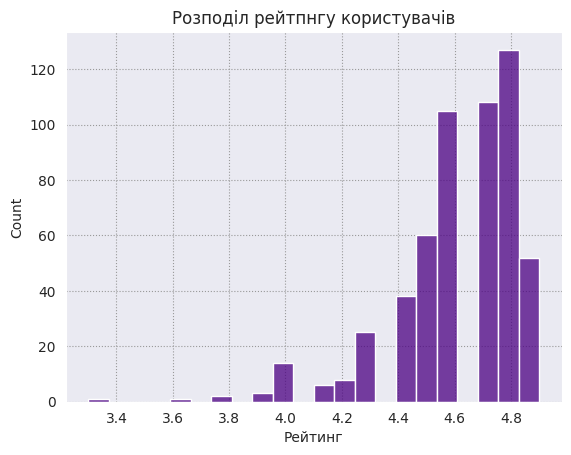

In [99]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.histplot(book_data['user_rating'], kde=True, color='#4B0082')
plt.title('Розподіл рейтпнгу користувачів')
plt.xlabel('Рейтинг')
plt.show()

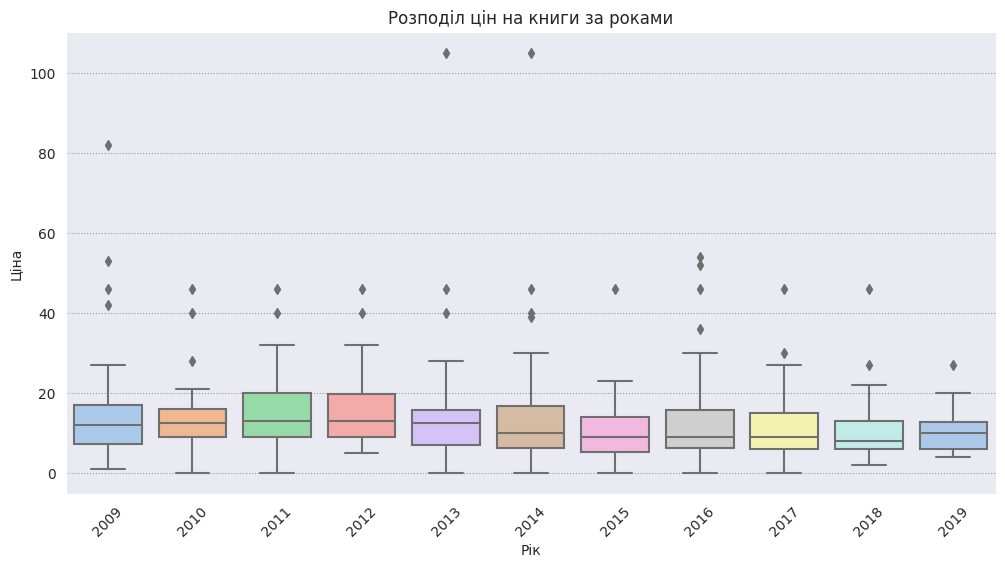

In [59]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='price', data=book_data, palette='pastel')
plt.title('Розподіл цін на книги за роками')
plt.xlabel('Рік')
plt.ylabel('Ціна')
plt.xticks(rotation=45)
plt.show()


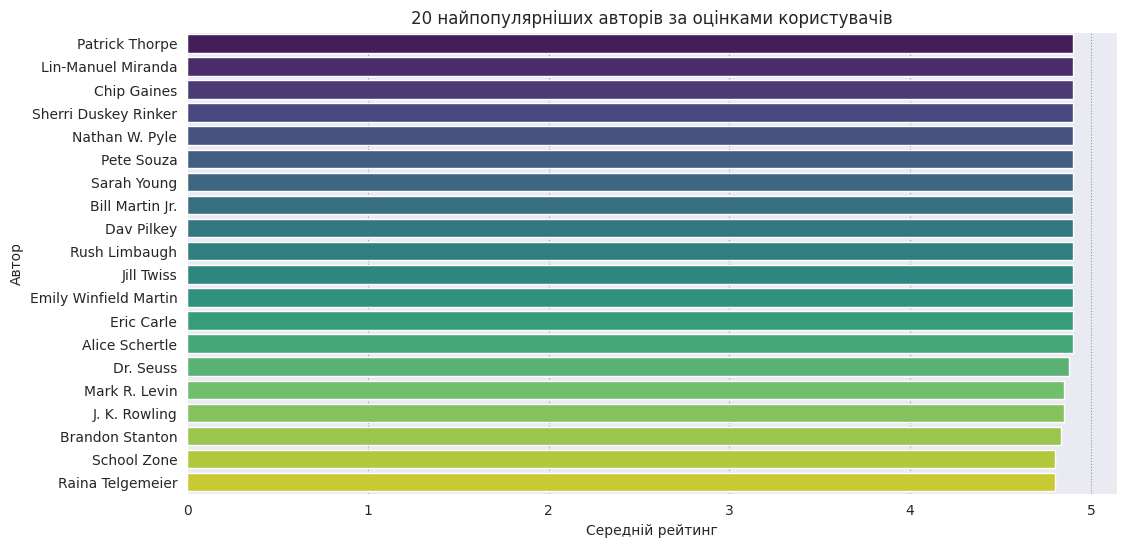

In [67]:
author_avg_rate = book_data.groupby('author')['user_rating'].mean().reset_index()
top_20_authors = author_avg_rate.sort_values(by='user_rating', ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x='user_rating', y='author', data=top_20_authors, palette='viridis')
plt.title('20 найпопулярніших авторів за оцінками користувачів')
plt.xlabel('Середній рейтинг')
plt.ylabel('Автор')

plt.show()

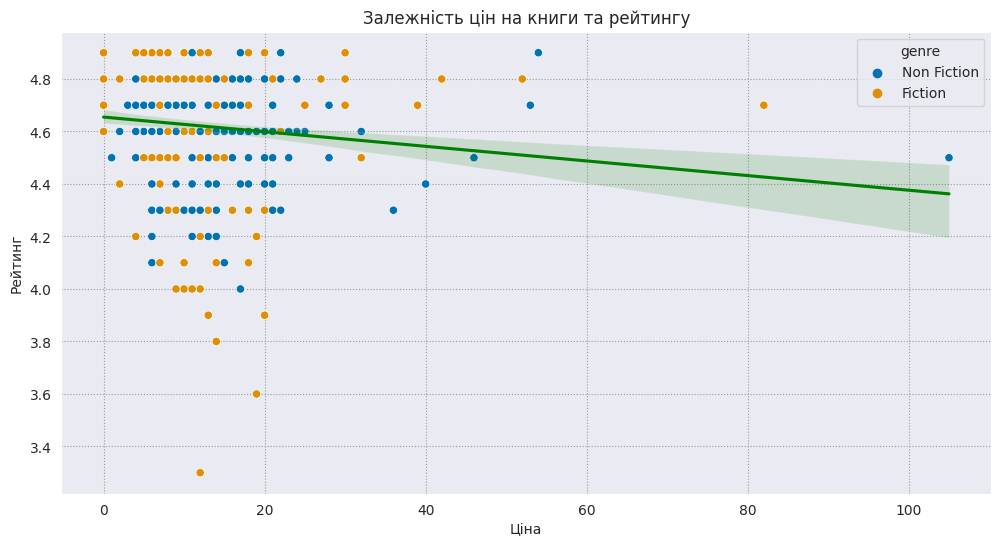

In [71]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x='price', y='user_rating', data=book_data, palette='colorblind', hue='genre')
sns.regplot(x='price', y='user_rating', data=book_data, scatter=False, color='green')
plt.title('Залежність цін на книги та рейтингу')
plt.xlabel('Ціна')
plt.ylabel('Рейтинг')
plt.show()